In [34]:
import pandas as pd
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import pickle

import utils as u
from models import Matern32_Model
%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
data = pd.read_csv('../data/gp_weekly_nta_data.csv')
data['DATETIME'] = pd.to_datetime(data['DATETIME'])

data.DATE_IND = data.DATE_IND.astype(float)  # try to bring down variance scale

data.rename(columns={'INJURED':'COUNT'},inplace=True)

data.COUNT = data.COUNT.astype(float)

data = data[data.BoroName == 'Manhattan']

e_s = data.e_s.mean()

In [36]:
print(e_s)

7.21637623588


In [37]:
search_periods = [[24,12]]
                 

In [42]:
for i, s in enumerate(search_periods):
    
    print('Beginning run {} : '.format(str(s)))
    #print('{} periods for training \n').format(s[0])
    #print('{} periods for testing \n').format(s[1])

    data_dict = u.preprocess(data, start_date= '2014/1/05', training_end_date= s[0], \
                                                           testing_end_date=s[1])


    m =  Matern32_Model(data_dict['X_train'],data_dict['y_train'],use_priors=True, e_s= e_s , period = 52)
    m.compile()
    opt = gpflow.train.ScipyOptimizer()
    print('Initial neg. log-likelihood: {}'.format(str(m.compute_log_likelihood())))
    opt.minimize(m, maxiter = 500)
    
    u.pred_GP(m,data_dict)
    test = data_dict['test']

    gp = test.groupby('DATETIME')['gp_sq_error'].mean() #/ test.GRID_SQUARE.max()
    ar = u.run_AR(data_dict)
    summary = pd.concat([gp,ar],axis=1)
    summary.plot()

    print(summary.mean())


Beginning run [24, 12] : 
Training ends on: 2014-06-22 00:00:00
testing ends on: 2014-09-14 00:00:00
Initial neg. log-likelihood: -inf


InvalidArgumentError: Got info = 1 for batch index 0, expected info = 0. Debug_info =potrf
	 [[Node: VGP-5c6d100d-170/Cholesky = Cholesky[T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/gpu:0"](VGP-5c6d100d-170/add_2)]]
	 [[Node: concat_17/_3823 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_2076_concat_17", tensor_type=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'VGP-5c6d100d-170/Cholesky', defined at:
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-cf85a8aeac25>", line 11, in <module>
    m.compile()
  File "/home/ecbm4040/GPflow/gpflow/models/vgp.py", line 87, in compile
    return super(VGP, self).compile(session=session)
  File "/home/ecbm4040/GPflow/gpflow/core/node.py", line 58, in compile
    self.build()
  File "/home/ecbm4040/GPflow/gpflow/core/node.py", line 156, in build
    self._build()
  File "/home/ecbm4040/GPflow/gpflow/models/model.py", line 81, in _build
    likelihood = self._build_likelihood()
  File "/home/ecbm4040/GPflow/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/home/ecbm4040/GPflow/gpflow/models/vgp.py", line 109, in _build_likelihood
    L = tf.cholesky(K)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 234, in cholesky
    result = _op_def_lib.apply_op("Cholesky", input=input, name=name)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Got info = 1 for batch index 0, expected info = 0. Debug_info =potrf
	 [[Node: VGP-5c6d100d-170/Cholesky = Cholesky[T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/gpu:0"](VGP-5c6d100d-170/add_2)]]
	 [[Node: concat_17/_3823 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_2076_concat_17", tensor_type=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


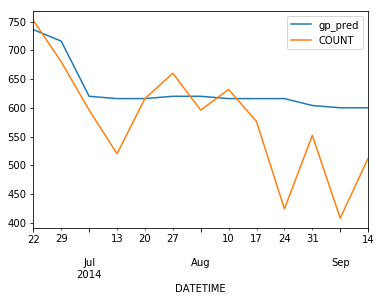

In [41]:
test.groupby('DATETIME')[['gp_pred','COUNT']].sum().plot()


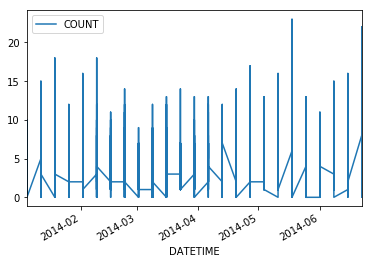

In [33]:
pred_train = m.predict_y(data_dict['X_train'])
train = data_dict['train']
train['gp_pred'] = pred_train[0]
test = data_dict['test']
test[['gp_pred','COUNT']].plot

train[['COUNT']].plot()


## This needs:
# train/test normalization has to be split
# prediction has to be done right when looking ahead (sequentially)


In [116]:
output

,pred,seed
DATETIME,,
2014-07-13,522.403,[[-0.38902993933]]
2014-07-20,NaN,NaN
2014-07-27,NaN,NaN
2014-08-03,NaN,NaN
2014-08-10,NaN,NaN
2014-08-17,NaN,NaN
2014-08-24,NaN,NaN
2014-08-31,NaN,NaN
2014-09-07,NaN,NaN


In [132]:
[data_dict['X_train'][-1]]



[array([ 0.80890999])]

In [151]:

#m.predict_f()[0]
#[output.ix[0,'seed'][0]]
[data_dict['X_train'][-1]]

output

,pred,seed
DATETIME,,
2014-07-13,"([[522.402527839]], [[5300.47907437]])",[[-0.38902993933]]
2014-07-20,"([[522.402527839]], [[5300.47907437]])",NaN
2014-07-27,NaN,NaN
2014-08-03,NaN,NaN
2014-08-10,NaN,NaN
2014-08-17,NaN,NaN
2014-08-24,NaN,NaN
2014-08-31,NaN,NaN
2014-09-07,NaN,NaN


In [150]:

output = pd.DataFrame(index=test.index, columns=['pred','seed'])

output.ix[0,'seed'] = m.predict_f([data_dict['X_train'][-1]])[0]

for i in range(output.shape[0]):
    output.ix[i+1,'pred'] = m.predict_y([output.ix[0,'seed'][0]])


                                       
    if i > 0:
        m.predict_f([output.ix[i,'seed']])[0]

output


[nan]


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


ValueError: Cannot feed value of shape (1,) for Tensor 'autoflow/VGP/predict_f/Placeholder:0', which has shape '(?, ?)'

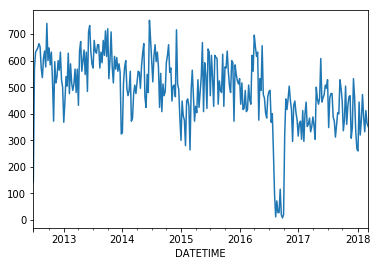

In [14]:
## Missing data 2016

data.groupby('DATETIME')['COUNT'].sum().plot()

In [ ]:
test.groupby('GRID_SQUARE')['COUNT'].sum().sort_values(ascending = False).head()

In [ ]:
test[test.GRID_SQUARE == 108][['gp_pred','COUNT']].plot()